## Birthday Paradox

It still feels unbelievable that with 100 people that 99.99+% probability that 2 share the same birthday! 

**Let's do some random sampling and see. Then see how the theory compares.**

In [1]:
import random

def random_birthday():
	return random.randint(1, 365)

In [31]:
def simulate_room_shared(N=100):
	birthdays = set()
	for _ in range(N):
		bday = random_birthday()
		if bday in birthdays:
			return True
		birthdays.add(bday)
	return False

simulate_room_shared(100)	

True

What about 23 which should have a 50% chance at least one pair of people share a birthday?

Text(0.5, 0, 'number of people in room')

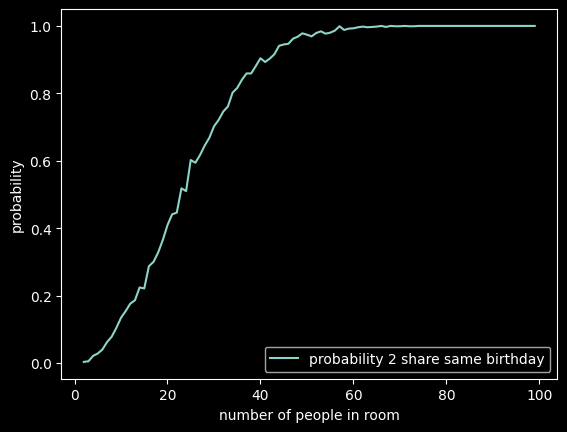

In [61]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def estimate_prob(N, trials=1_000):
	results = [int(simulate_room_shared(N)) for _ in range(trials)]
	return sum(results) / trials

r = range(2,100)
plt.plot(r,[estimate_prob(i) for i in r], label="probability 2 share same birthday")
plt.legend()
plt.ylabel("probability")
plt.xlabel("number of people in room")

Before I show this theoretically, what about generally speaking how many share a birthday?

100%|██████████| 50/50 [00:02<00:00, 20.79it/s]


Text(0.5, 0, 'number of people in room')

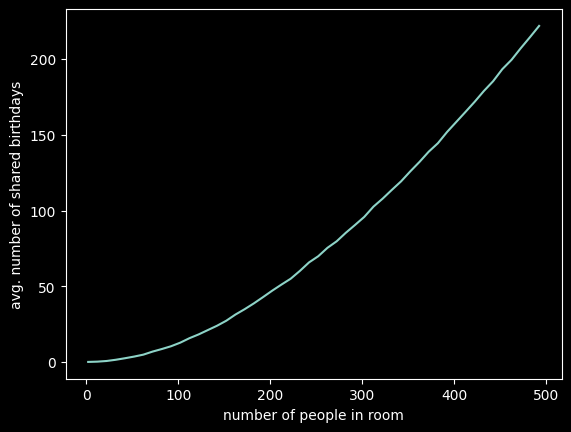

In [62]:
from tqdm import tqdm

def count_raw_shared_birthdays(N):
	shared = 0
	birthdays = set()
	for i in range(N):
		bday = random_birthday()
		if bday in birthdays:
			shared += 1
		birthdays.add(bday)
	return shared

def count_average_trials(N, trials=200):
	summed = 0
	for _ in range(trials):
		summed += count_raw_shared_birthdays(N)
	return summed / trials

r = range(2, 500, 10)
sim = [count_average_trials(i) for i in tqdm(r)]
plt.plot(r, sim)
plt.ylabel("avg. number of shared birthdays")
plt.xlabel("number of people in room")